In [166]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV,RepeatedStratifiedKFold,train_test_split,GridSearchCV
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict,KFold
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [137]:
df=pd.read_csv("diabetes (1).csv")

In [138]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [139]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<function matplotlib.pyplot.show(close=None, block=None)>

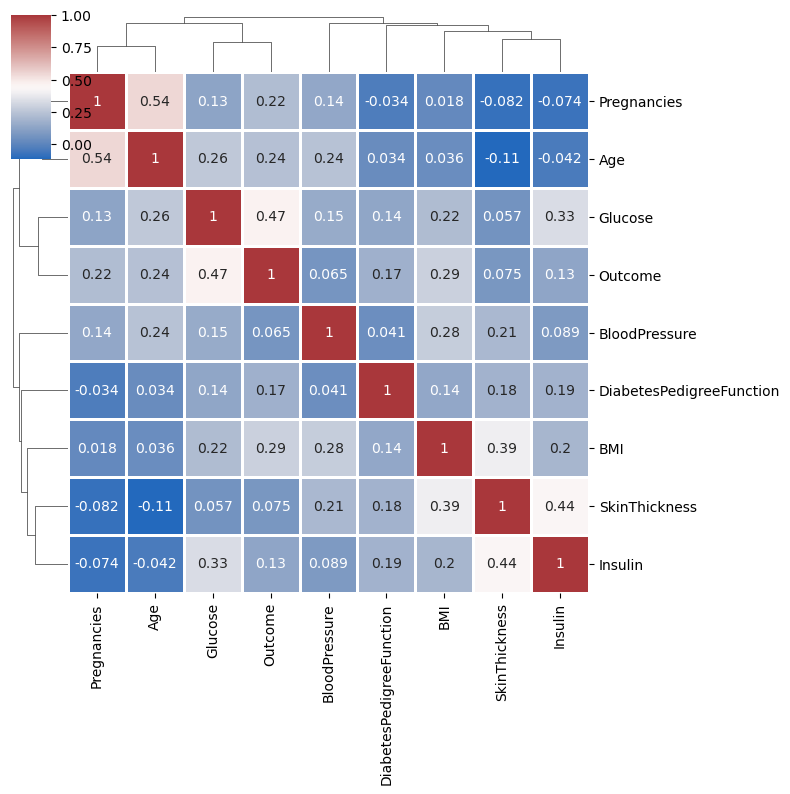

In [141]:
sns.clustermap(df.corr(), cmap="vlag",dendrogram_ratio=(0.1,0.1), annot=True,linewidths=0.8,figsize=(8,8))
plt.show

In [142]:
X=df.drop("Outcome",axis=1)
name=X.columns
y=df["Outcome"]

scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)
df_dummy=pd.concat([pd.DataFrame(x_scaled,columns=name[:]),y],axis=1)
df_dummy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


<function matplotlib.pyplot.show(close=None, block=None)>

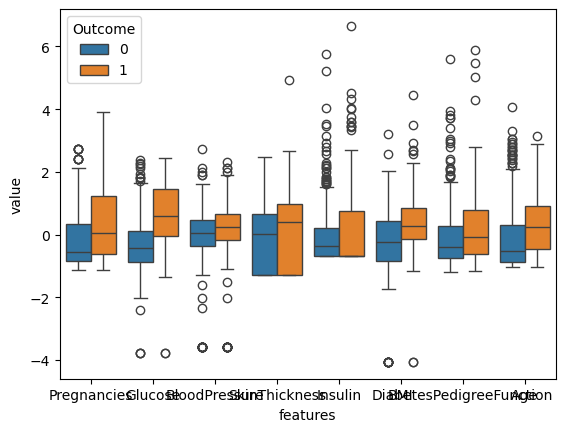

In [143]:
#görselleştirme
data_melted=pd.melt(df_dummy,id_vars="Outcome",var_name="features",value_name="value")
#boxplot
plt.figure()
sns.boxplot(x="features",y="value",hue="Outcome",data=data_melted)
plt.show

In [144]:
for i in name:
    Q1 = df_dummy[i].quantile(0.25)
    Q3 = df_dummy[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri alt ve üst sınırlarla baskıla
    df_dummy[i] = df_dummy[i].clip(lower=lower_bound, upper=upper_bound)

<function matplotlib.pyplot.show(close=None, block=None)>

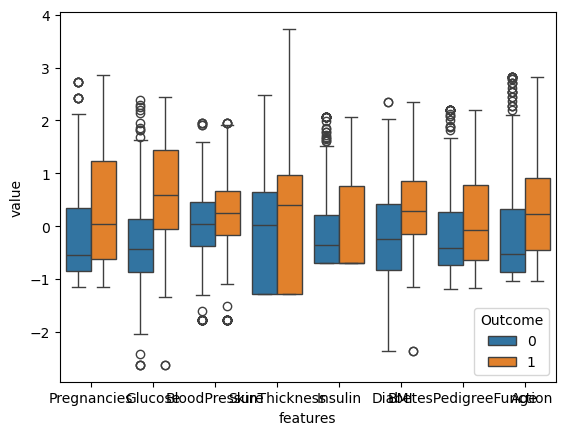

In [145]:
#görselleştirme
data_melted=pd.melt(df_dummy,id_vars="Outcome",var_name="features",value_name="value")
#boxplot
plt.figure()
sns.boxplot(x="features",y="value",hue="Outcome",data=data_melted)
plt.show

In [146]:
X=df_dummy.drop("Outcome",axis=1)
y=df_dummy["Outcome"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

In [147]:
log=LogisticRegression()
log.fit(X_train,y_train)
#olasılık değeri verir
#y_prob=log.predict_proba(X_test)
#y_pred=np.argmax(y_prob,axis=1)
y_pred=log.predict(X_test)
sc=accuracy_score(y_test,y_pred)
sc

0.7445887445887446

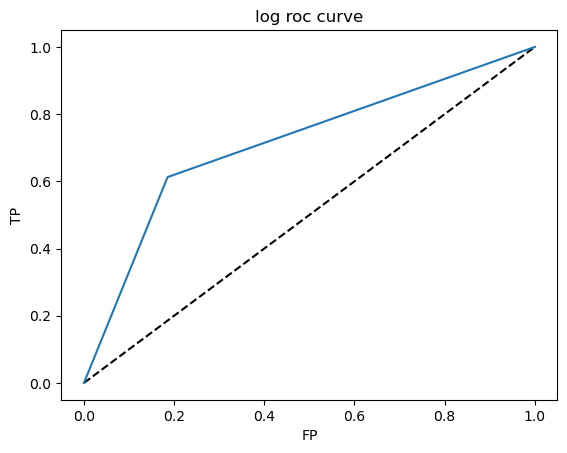

In [148]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Lo")
plt.xlabel("FP")
plt.ylabel("TP")
plt.title("log roc curve")
plt.show()

In [149]:
log=LogisticRegression()
penalty=["l1","l2"]
parameters={"penalty":penalty}
lr=GridSearchCV(log,parameters)
lr.fit(X_train,y_train);
lr.best_params_

C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _check_

{'penalty': 'l2'}

In [171]:
y_pred=lr.predict(X_test)
sc_b=accuracy_score(y_test,y_pred)

cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231



lr:accuracy:0.7801537386443046,std:0.05828607531428712
DT:accuracy:0.7038434661076172,std:0.06431333724961506
KNN:accuracy:0.7616002795248078,std:0.04539752294556359
NB:accuracy:0.7447239692522711,std:0.05190207230422718
svm:accuracy:0.771069182389937,std:0.04640732700749383
AdaB:accuracy:0.763382250174703,std:0.060001018990471895
RF:accuracy:0.7616002795248078,std:0.0446942189004666
GBM:accuracy:0.7597134870719776,std:0.056197924294582126


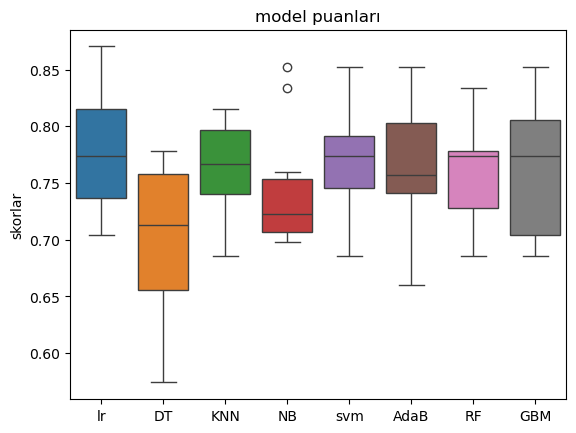

In [163]:
def getmodels():
    models=[]
    models.append(("lr",LogisticRegression()))
    models.append(("DT",DecisionTreeClassifier()))
    models.append(("KNN",KNeighborsClassifier()))
    models.append(("NB",GaussianNB()))
    models.append(("svm",SVC()))
    models.append(("AdaB", AdaBoostClassifier()))
    models.append(("RF",RandomForestClassifier()))
    models.append(("GBM", GradientBoostingClassifier()))

    return models

def modelstrain(x_train,y_train,models):
    results=[]
    names=[]
    for name,model in models:
        kfold=KFold(n_splits=10)
        cv_result=cross_val_score(model,x_train,y_train,cv=kfold,scoring="accuracy")
        results.append(cv_result)
        names.append(name)
        print(f"{name}:accuracy:{cv_result.mean()},std:{cv_result.std()}")
        
    return names,results

def plot_box(names,results):
    df=pd.DataFrame({names[i]:results[i] for i in range(len(names))})
    plt.figure()
    sns.boxplot(data=df)
    plt.title("model puanları")
    plt.ylabel("skorlar")
    plt.show()

models=getmodels()
names,results=modelstrain(x_train,y_train,models)
plot_box(names,results)


In [165]:
?RandomForestClassifier[]

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the

In [164]:
from sklearn.model_selection import GridSearchCV

def grid_search(models, names, x_train, y_train):
    best_models = []
    
    for name, model in models:
        # Model için parametre ızgarasını tanımla
        if name == "lr":
            param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
        elif name == "DT":
            param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
        elif name == "KNN":
            param_grid = {'n_neighbors': [3, 5, 7, 10], 'metric': ['euclidean', 'manhattan']}
        elif name == "NB":
            param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7]}
        elif name == "svm":
            param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
        elif name == "AdaB":
            param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1]}
        elif name == "RF":
            param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20]}
        elif name == "GBM":
            param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 7]}

        # GridSearchCV'yi başlat
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
        grid_search.fit(x_train, y_train)

        # En iyi parametreler ve model sonuçları
        print(f"Model: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best Accuracy: {grid_search.best_score_}\n")
        
        # En iyi modeli listeye ekle
        best_models.append((name, grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_))
    
    return best_models

# Modelleri ve isimleri al
models = getmodels()

# GridSearchCV ile en iyi parametreleri hesapla ve modelleri eğit
best_models = grid_search(models, names, x_train, y_train)

# En iyi modelleri yazdır
for name, model, best_params, best_accuracy in best_models:
    print(f"Model: {name}")
    print(f"Best Parameters: {best_params}")
    print(f"Best Accuracy: {best_accuracy}\n")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Model: lr
Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best Accuracy: 0.7820699203876774

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Model: DT
Best Parameters: {'max_depth': 5, 'min_samples_split': 10}
Best Accuracy: 0.7485981308411216

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Model: KNN
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5}
Best Accuracy: 0.7690896503980615

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Model: NB
Best Parameters: {'var_smoothing': 1e-09}
Best Accuracy: 0.7485462097611629

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Model: svm
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Best Accuracy: 0.785790931118034

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Model: AdaB
Best Parameters: {'learning_rate': 1, 'n_estimators': 200}
Best Accuracy: 0.7634821737625476

Fitting 5 folds for each of 6 candidates, totalling 